In [168]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from utils.DataUtils import *
from utils.EnvironmentUtils import *
%matplotlib inline

In [169]:
equity_data=pd.read_pickle('data/equity_data')

In [170]:
index_data=pd.read_pickle('data/index_data')

In [173]:
hedge_result=pd.read_pickle('backup/trading_result_good')
hedge_result.index=pd.DatetimeIndex(hedge_result.index.map(lambda x:pd.to_datetime(str(x)).date()))
hedge_actions=np.load('backup/actions_good.npy')

In [175]:
single_result=pd.read_pickle('trading_result_3')
single_result.index=pd.DatetimeIndex(single_result.index.map(lambda x:pd.to_datetime(str(x)).date()))
single_actions=np.load('actions_3.npy')

In [177]:
benchmark=index_data['spy',hedge_result.index,:]['Last']
benchmark_return=(benchmark/benchmark.shift(1)).fillna(1)

In [179]:
hedge_returns=hedge_result[['returns']]
single_returns=single_result[['returns']]

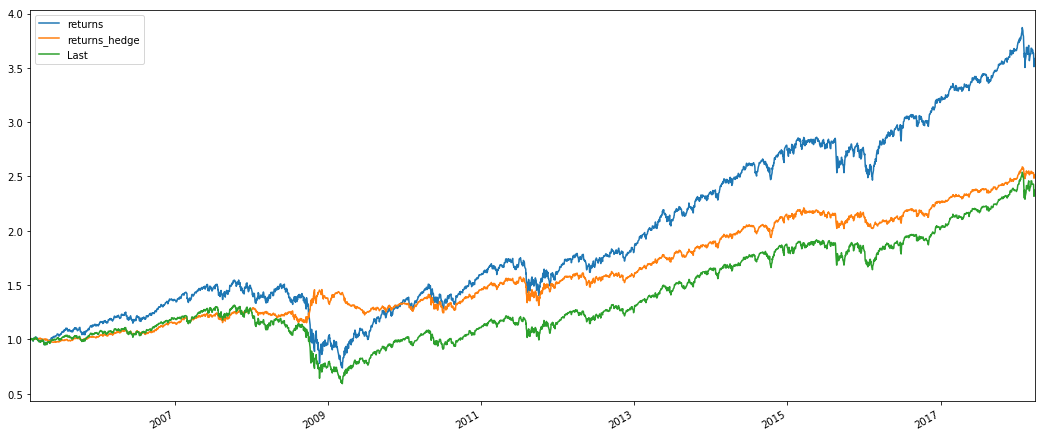

In [180]:
(single_returns+1).join(hedge_returns+1,rsuffix='_hedge').join(benchmark_return).cumprod().plot(figsize=(18,8))

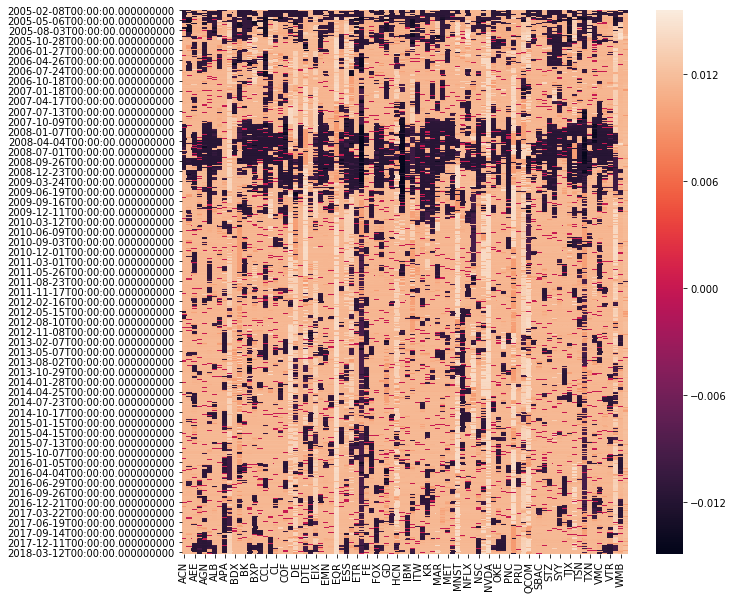

In [181]:
hedge_action_df=pd.DataFrame(hedge_actions,columns=list(equity_data.items)+['CASH'],index=hedge_result.index)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(hedge_action_df,ax=ax)

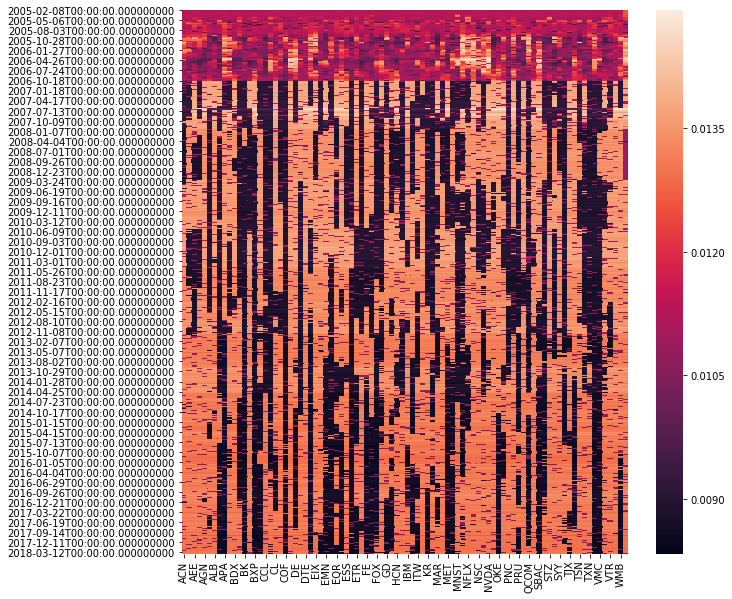

In [182]:
single_action_df=pd.DataFrame(single_actions,columns=list(equity_data.items)+['CASH'],index=single_result.index)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(single_action_df,ax=ax)

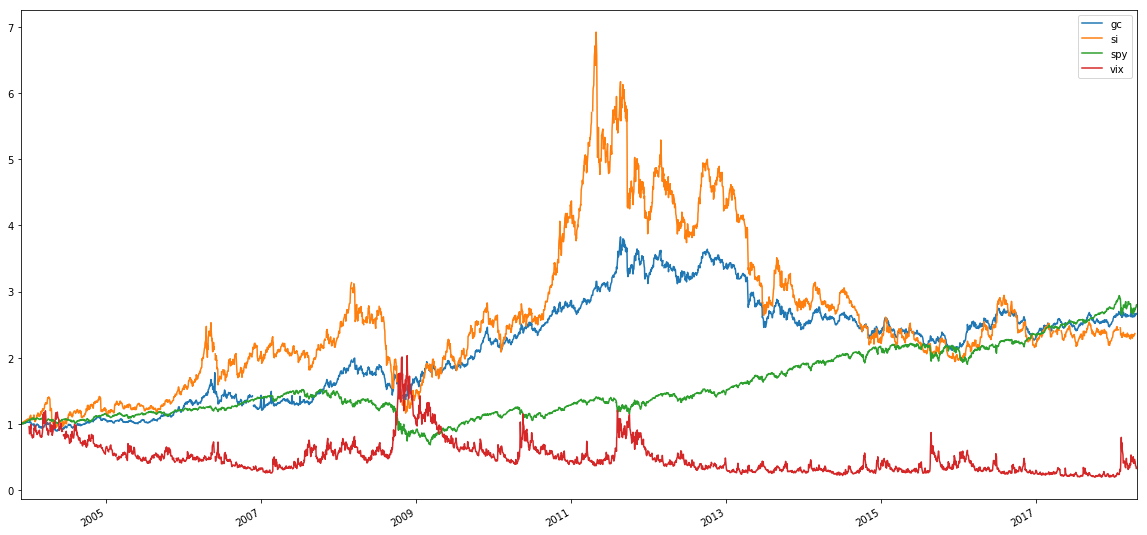

In [206]:
(index_data[:,equity_data.major_axis[0]:,'Last']/index_data[:,equity_data.major_axis[0]:,'Last'].shift(1)).cumprod().plot(figsize=(20,10))

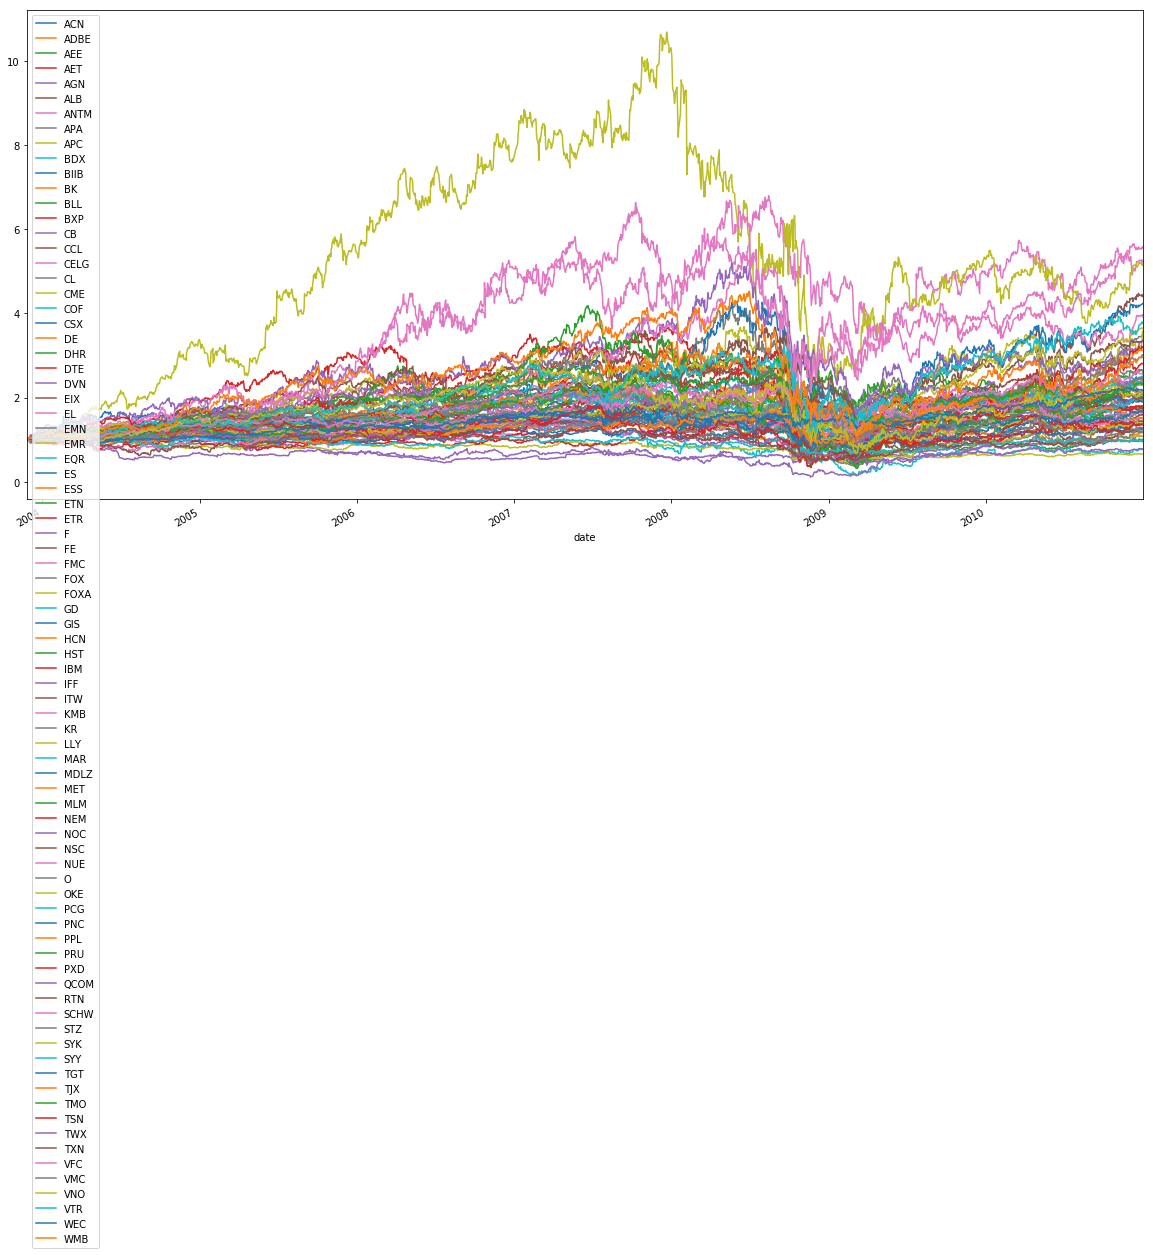

In [207]:
(equity_data[better_options,:,'adj_close']/equity_data[better_options,:,'adj_close'].shift(1)).cumprod()[:'2010'].plot(figsize=(20,10))

In [205]:
# sp500 = pd.read_csv('sp500.csv')
# sp500.index = sp500['Symbol']
# high_cap_company = sp500.loc[list(itertools.chain.from_iterable(list(map(lambda x: x[1][:5], list(sp500.sort_values('Market Cap').groupby('Sector').groups.items())))))]

In [204]:
# start_date_str = '2005-02-08'
# end_date_str = '2018-03-27'
# bootstrap_length = 300
# data, env, bundle, sim_params = build_backtest_environment(start_date_str, end_date_str)

In [203]:
# assets = list(high_cap_company.Symbol.values)
# # assets = retrieve_equitys(bundle, assets)

In [202]:
# initial_history_start_date = bundle.equity_daily_bar_reader.sessions[bundle.equity_daily_bar_reader.sessions < start_date_str][(-bootstrap_length - 1)]
# initial_history_end_date = bundle.equity_daily_bar_reader.sessions[bundle.equity_daily_bar_reader.sessions > start_date_str][0]
# filtered_assets_index = (np.isnan(np.sum(bundle.equity_daily_bar_reader.load_raw_arrays(columns=['close'], start_date=initial_history_start_date, end_date=initial_history_end_date, assets=assets), axis=1)).flatten() == False)
# assets = list(np.array(assets)[filtered_assets_index])

In [201]:
# remain_asset_names = list(map(lambda x: x.symbol, assets))

In [200]:
# equity_data = prepare_equity_data(initial_history_start_date, remain_asset_names,data_path='data/equity_data_bak')

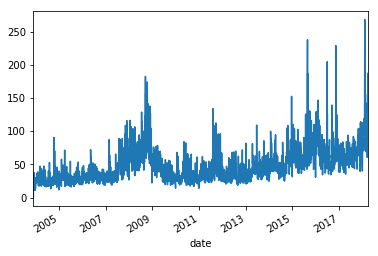

In [208]:
equity_data[:,:,'adj_close'].rolling(window=3).std().sum(axis=1).plot()

In [163]:
def generate_tech_data(stock, open_name, close_name, high_name, low_name,max_time_window=10):
    open_price = stock[open_name].values
    close_price = stock[close_name].values
    low_price = stock[low_name].values
    high_price = stock[high_name].values
    data = pd.DataFrame(stock)
    data['MOM'] = talib.MOM(close_price,timeperiod=max_time_window)
    # data['_SMA'] = talib.SMA(close_price)
    data['HT_DCPERIOD'] = talib.HT_DCPERIOD(close_price)
    data['HT_DCPHASE'] = talib.HT_DCPHASE(close_price)
    data['sine'], data['leadsine'] = talib.HT_SINE(close_price)
    data['inphase'], data['quadrature'] = talib.HT_PHASOR(close_price)
    # data['_HT_TRENDMODE'] = talib.HT_TRENDMODE(close_price)
    # data['_SAREXT'] = talib.SAREXT(high_price, low_price)
    # data['_ADX'] = talib.ADX(high_price, low_price, close_price)
    data['ADXR'] = talib.ADXR(high_price, low_price, close_price,timeperiod=max_time_window)
    data['APO'] = talib.APO(close_price,fastperiod=max_time_window//2,slowperiod=max_time_window)
    data['AROON_UP'], _ = talib.AROON(high_price, low_price,timeperiod=max_time_window)
    # data['_BOP'] = talib.BOP(open_price, high_price, low_price, close_price)
    data['CCI'] = talib.CCI(high_price, low_price, close_price,timeperiod=max_time_window)
    data['PLUS_DI'] = talib.PLUS_DI(high_price, low_price, close_price,timeperiod=max_time_window)
    # data['_PLUS_DM'] = talib.PLUS_DM(high_price, low_price)
    data['PPO'] = talib.PPO(close_price,fastperiod=max_time_window//2,slowperiod=max_time_window)
    data['macd'], data['macd_sig'], data['macd_hist'] = talib.MACD(close_price,fastperiod=max_time_window//2,slowperiod=max_time_window,signalperiod=max_time_window//2)
    data['CMO'] = talib.CMO(close_price,timeperiod=max_time_window)
#     data['ROC'] = talib.ROC(close_price)
    data['ROCP'] = talib.ROCP(close_price,timeperiod=max_time_window)
#     data['ROCR'] = talib.ROCR(close_price)
#     data['slowk'], data['slowd'] = talib.STOCH(high_price, low_price, close_price)
    data['fastk'], data['fastd'] = talib.STOCHF(high_price, low_price, close_price)
    data['TRIX'] = talib.TRIX(close_price,timeperiod=max_time_window)
    data['ULTOSC'] = talib.ULTOSC(high_price, low_price, close_price,timeperiod1=max_time_window//2,timeperiod2=max_time_window,timeperiod3=max_time_window*2)
    data['WILLR'] = talib.WILLR(high_price, low_price, close_price,timeperiod=max_time_window)
    data['NATR'] = talib.NATR(high_price, low_price, close_price,timeperiod=max_time_window)
    # data['_TRANGE'] = talib.TRANGE(high_price, low_price, close_price)
    data = data.drop([open_name, close_name, high_name, low_name], axis=1)
#     data.columns=data.columns.map(lambda x:x[1:])
    data = data.dropna().astype(np.float32)
    return data
def generate_stock_features(history_data):
    stock_features = {}
    for c in history_data.items:
        columns = ['adj_open', 'adj_close', 'adj_high', 'adj_low', 'adj_volume']
        stock_data = history_data[c, :, columns].fillna(method='ffill').fillna(method='bfill')
        tech_data = generate_tech_data(stock_data.astype(float), columns[0], columns[1], columns[2], columns[3])
        stock_data['adj_volume']=stock_data['adj_volume'].replace(0,np.nan).fillna(method='ffill')
        stock_data['log_volume'] = np.log(stock_data['adj_volume'])
        tech_data = tech_data.join(stock_data['log_volume'])
        tech_data=tech_data.drop('adj_volume',axis=1)
        return_rate = pd.Series((stock_data['adj_close'] / stock_data['adj_close'].shift(1)).fillna(1), name='return_rate')
        tech_data = tech_data.join(return_rate)
        stock_features[c] = tech_data
    return pd.Panel(stock_features).dropna()
def generate_index_features(index_data):
    index_features = {}
    for c in index_data.items:
        columns = ['Open', 'Last', 'High', 'Low']
        index = index_data[c, :, columns].fillna(method='ffill').fillna(method='bfill')
        tech_data = generate_tech_data(index.astype(float), columns[0], columns[1], columns[2], columns[3])
        return_rate = pd.Series((index['Last'] / index['Last'].shift(1)).fillna(1), name='return_rate')
        tech_data = tech_data.join(return_rate)
        index_features[c] = tech_data
    return pd.Panel(index_features).dropna()

In [164]:
equity_features=generate_stock_features(equity_data)

In [165]:
equity_features.minor_axis

Index(['MOM', 'HT_DCPERIOD', 'HT_DCPHASE', 'sine', 'leadsine', 'inphase',
       'quadrature', 'ADXR', 'APO', 'AROON_UP', 'CCI', 'PLUS_DI', 'PPO',
       'macd', 'macd_sig', 'macd_hist', 'CMO', 'ROCP', 'fastk', 'fastd',
       'TRIX', 'ULTOSC', 'WILLR', 'NATR', 'log_volume', 'return_rate'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a4d54278>,
      dtype=object)

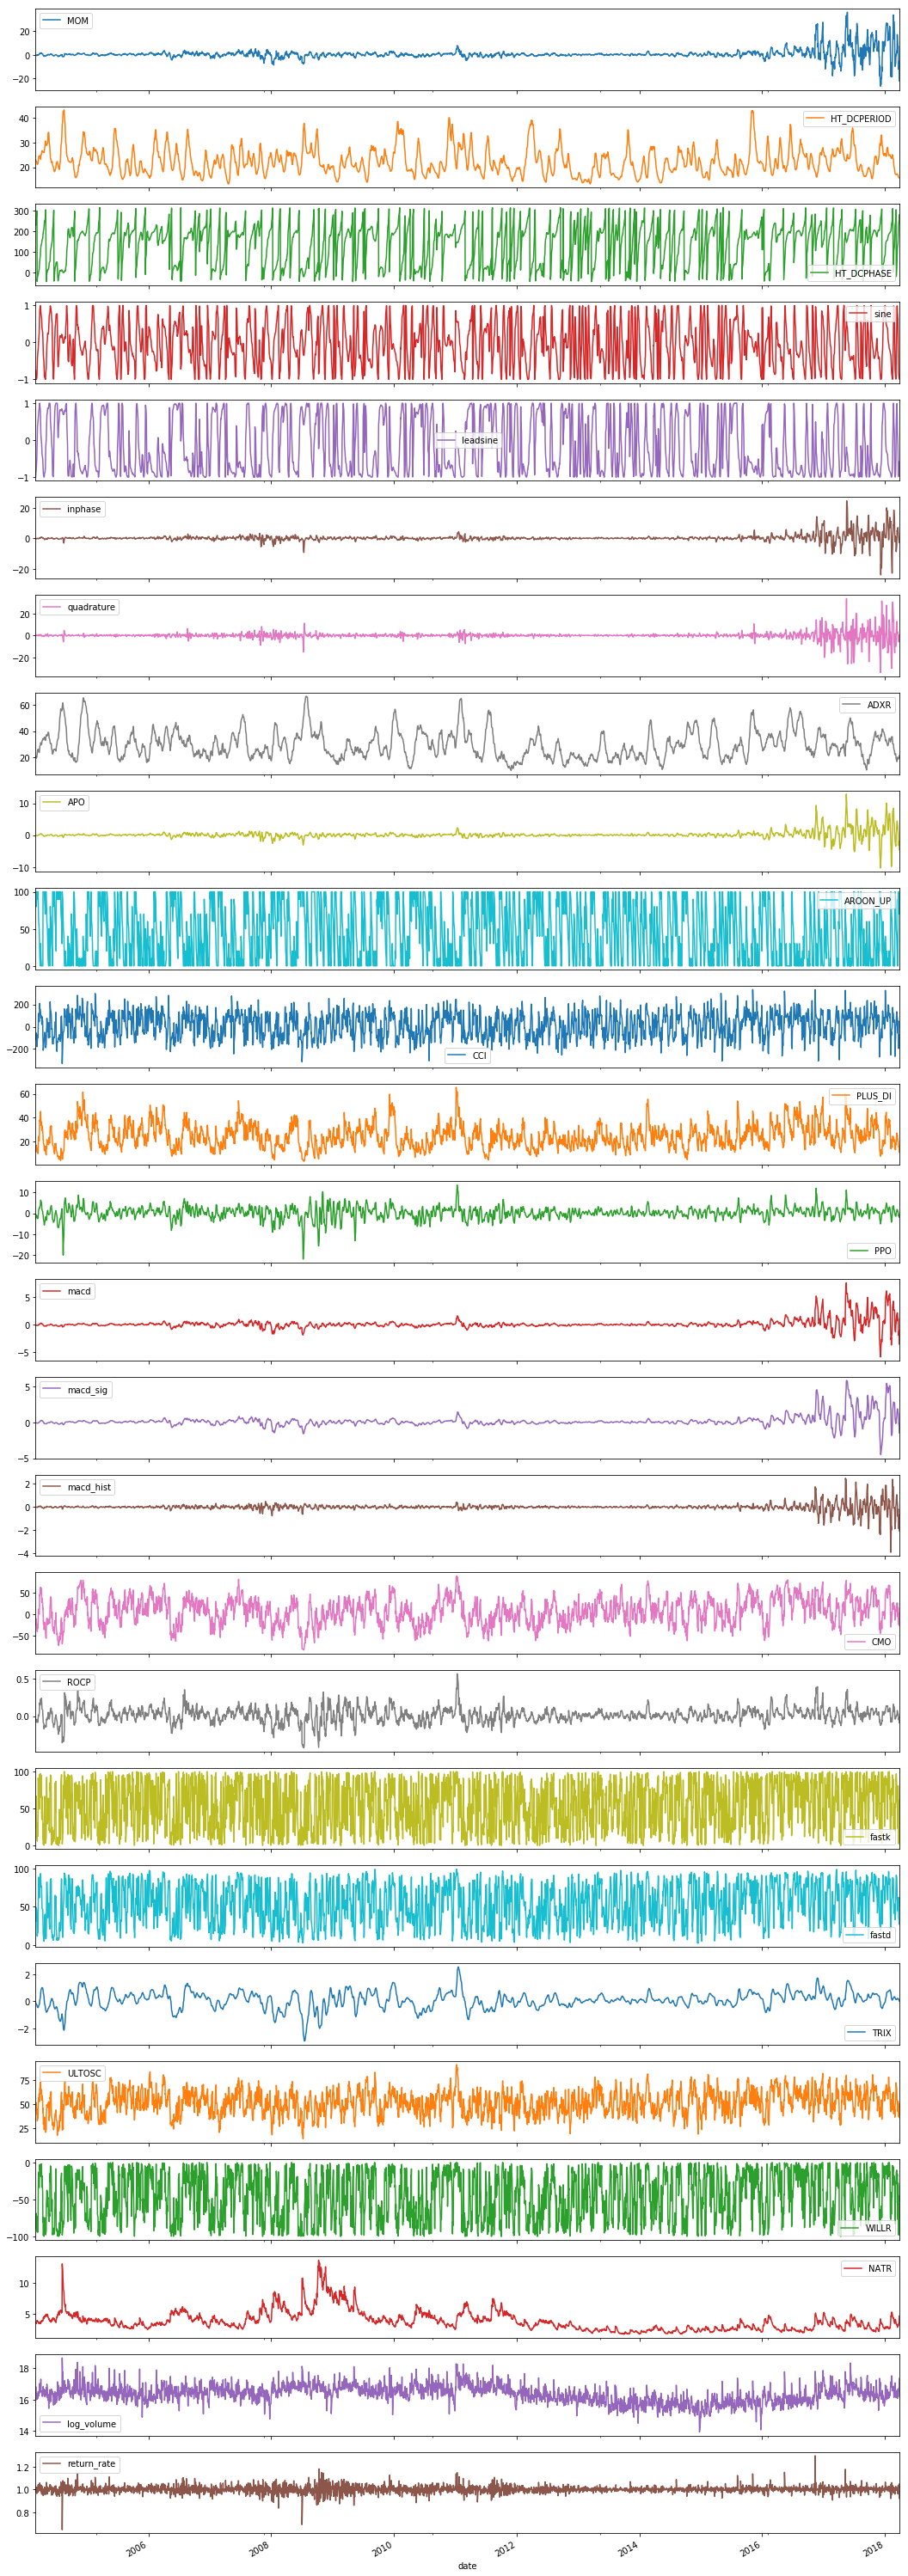

In [166]:
equity_features['NVDA',:,:].plot(subplots=True,figsize=(18,60))

In [125]:
normalized_equity_features=equity_features[:,:,:].apply(func=normalize_all, axis='major_axis')

In [117]:
equity_data['BIIB',:,'adj_volume'].replace(0,np.nan).fillna(method='ffill').isnull().sum()

0

In [132]:
index_features=generate_index_features(index_data=index_data)

In [162]:
talib.NATR?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f36a58b2b00>,
      dtype=object)

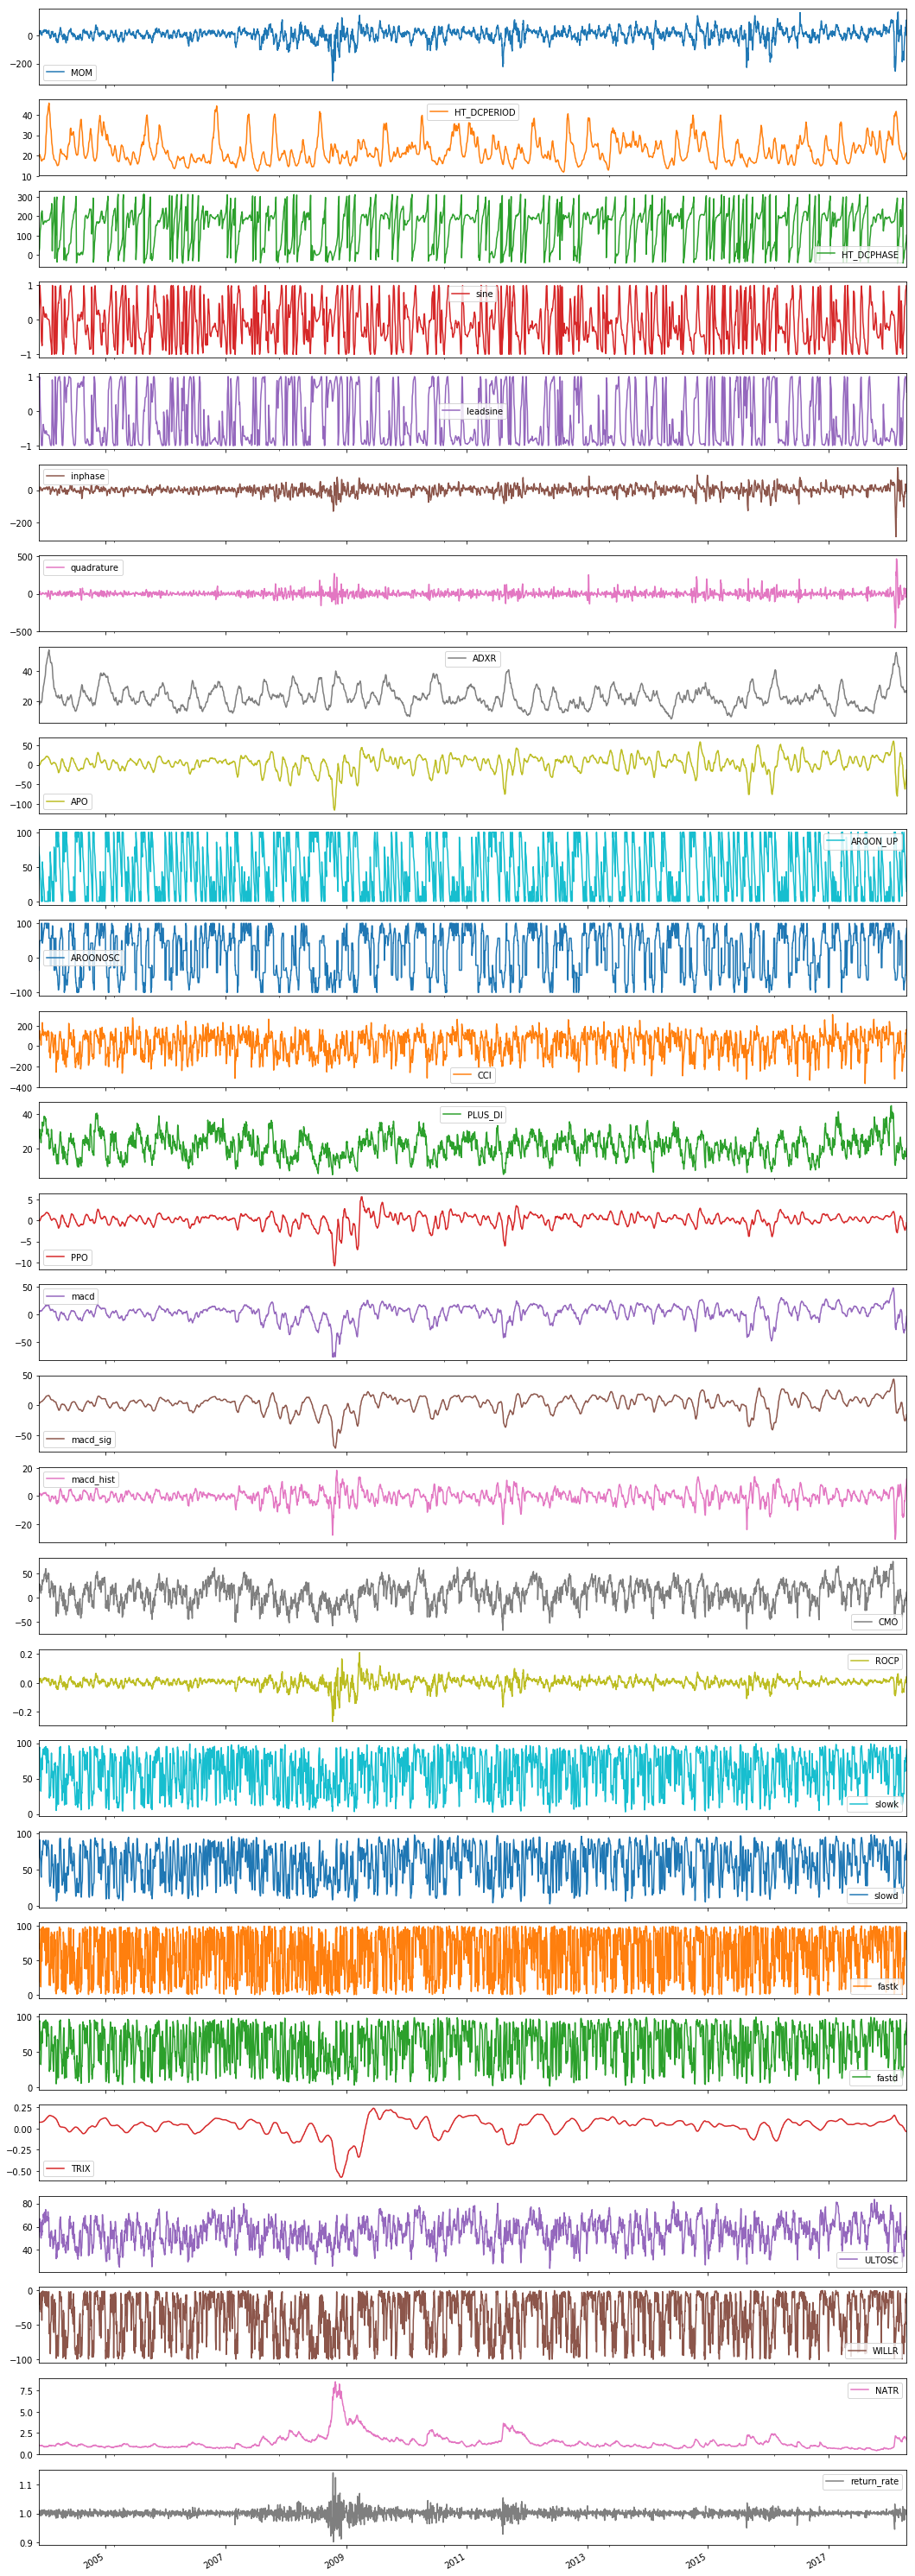

In [135]:
index_features['spy',equity_data.major_axis[0]:,:].plot(subplots=True,figsize=(18,60))